In [1]:
#Note Boyd References a value of 5.7 * 10^-20 likely measured at 1064 nm or 532 nm

from os import path
from copy import deepcopy

from IPython.display import Math, Latex
import sympy as sp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import init_printing

import get_effective_freq_dependence_from_raw_output as main

init_printing()

In [2]:
from matplotlib import __version__ as mpl_v
mpl_v

'3.2.1'

In [41]:
def eV_and_hartree(df):
    df_ev = deepcopy(df)
    df_hartree = deepcopy(df)
    
    df_ev.index = df_ev['freq (eV)']
    df_hartree = df_hartree.drop('freq (eV)', 1)
    
    df_hartree.index = df_hartree['freq (Hartree)']
    df_ev = df_ev.drop('freq (Hartree)', 1)
    return df_ev, df_hartree

def plot_data_frames(dataframes, labels, descripter, x_axis='freq probe (eV)', display_the_dfs=False,
                     plot_measured_ground_state=False, colors=['b','g','r','c','m','k'], ticks=['+','x'],
                     alpha=0.5, yscale="linear", xlims=[None, None], ylims_gamma=[None, None],
                     ylims_chi3=[None, None], nochi3=False, nth_label_to_keep=1, sup_y=None):
    """
    yscale values: {"linear", "log", "symlog", "logit", 'function', ...}
    """
    
    assert(len(dataframes) == len(labels))
    ticklen = len(ticks)
    colorlen = len(colors)
    
    if nochi3:
        size = (6, 4.2)
        no_cols = 1
        if sup_y == None:
            sup_y = 1.25
    else:
        size = (10.5, 3.6)
        no_cols = 2
        if sup_y == None:
            sup_y = 1.35
    
    if display_the_dfs:
        for df in dataframes:
            display(df)
    fig, axes = plt.subplots(nrows=1, ncols=no_cols, squeeze=False, figsize=size)
    sup_title = "Calculated Rotationally Averaged 3rd Order Response\nDunning Double Zeta Basis"
    fig.suptitle(sup_title, y=sup_y, fontsize=24)
    plt.tight_layout()
    fig.subplots_adjust(hspace=0, wspace=0.3)
    
    for index, df in enumerate(dataframes):
        markers = colors[index%colorlen] + ticks[index%ticklen]
        axes[0][0].plot(df[x_axis], df['gamma effective'], markers, label=labels[index])
    y_label = "$\gamma_{\t_{eff}}$ (au.)"
    x_label = x_axis
    axes[0][0].set_title("{1} {0}".format("$\gamma_{\t_{effective}}$", descripter), fontsize=24, y=1.13)
    axes[0][0].tick_params(labelsize=13)
    axes[0][0].set_ylabel(y_label, fontsize=20)
    axes[0][0].set_xlabel(x_label, fontsize=20)
    axes[0][0].legend()
    axes[0][0].set_xlim(xlims[0], xlims[1])
    axes[0][0].set_ylim(ylims_gamma[0], ylims_gamma[1])
    axes[0][0].set_yscale(yscale)
   # axes[0][0].locator_params(axis='y', nbins=10)
    for index, label in enumerate(axes[0][0].yaxis.get_ticklabels()):
        if index % nth_label_to_keep !=0:
            label.set_visible(False)

    if nochi3:
        pass
    else:
        for index, df in enumerate(dataframes):
            markers = colors[index%colorlen] + ticks[index%ticklen]
            axes[0][1].plot(df[x_axis], df['chi3 effective'], markers, label=labels[index])
        if plot_measured_ground_state:
            axes[0][1].plot([1.1653], [5.7*10**(-20)], 'ro', label="reported ground state")
        x_label = x_axis
        y_label = "$\chi^{(3)}_{\t_{eff}}}$ (SI)"
        axes[0][1].set_title("{1} {0}".format("$\chi^{(3)}_{\t_{eff}}}$", descripter), fontsize=24, y=1.13)
        axes[0][1].tick_params(labelsize=13, which='both')
        axes[0][1].set_ylabel(y_label, fontsize=20)
        axes[0][1].set_xlabel(x_label, fontsize=20)
        axes[0][1].set_xlim(xlims[0], xlims[1])
        axes[0][1].set_ylim(ylims_chi3[0], ylims_chi3[1])
        axes[0][1].legend()
        axes[0][1].set_yscale(yscale)
        if 'log' in yscale:
            pass
            #axes[0][1].LogLocator(base=10.0, subs=[1.0], numdecs=4, numticks=15)
        for index, label in enumerate(axes[0][1].yaxis.get_ticklabels()):
            if index % nth_label_to_keep !=0:
                label.set_visible(False)
    plt.show()
    
def get_dfs(dir_path, output_file_name='effective_chi3_freq_response_NBopt_dunningZ_2.csv'):
    output_df = main.main(dir_path, output_file_name, True, True)
    good_df = output_df[output_df.warning_flag != True]
    return output_df, good_df

In [4]:


output_df_state2, good_df_state2 = get_dfs('NB_excited_S1_state_freq_dependence')
output_df_state1, good_df_state1 = get_dfs('NB_ground_state_freq_dependence')
output_df_freq_perm, good_df_freq_perm = get_dfs('freq_permutations')
output_df_freq_EUV, good_df_freq_EUV = get_dfs('NB_EUV_freq_dep')


found file  = state-2_freq-0.003_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.006_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.009000000000000001_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.012_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.015_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.018000000000000002_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.021_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.024_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.027_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.033_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.036000000000000004_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.039_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.03_cubic_response_NBopt_dunningZ-2.out
found file  = state-2_freq-0.042_cubic_response_NBopt_dunni

<IPython.core.display.Math object>

found file  = freq-0.003_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.006_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.009000000000000001_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.012_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.015_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.018000000000000002_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.021_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.024_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.027_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.033_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.036000000000000004_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.039_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.03_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.042_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.045_cubic_response_NBopt_dunningZ-2.out
found file  = freq-0.048_cubic_response_N

<IPython.core.display.Math object>

found file  = state-1_freq-0.0544_spin-1_perm-0_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.0544_spin-1_perm-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.0544_spin-1_perm-2_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.058899999999999994_spin-1_perm-0_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.058899999999999994_spin-1_perm-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.058899999999999994_spin-1_perm-2_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.0634_spin-1_perm-0_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.0634_spin-1_perm-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.0634_spin-1_perm-2_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_d

<IPython.core.display.Math object>

found file  = state-1_freq-0.2921_spin-1_perm-0_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.33033333333333337_spin-1_perm-0_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.36856666666666665_spin-1_perm-0_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freq-0.4068_spin-1_perm-0_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out


<IPython.core.display.Math object>

found file  = state-1_freqd-0.15_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.17142857142857143_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.19285714285714284_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.21428571428571427_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2357142857142857_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2571428571428571_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2785714285714286_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.3_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out


<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.150000,4.081708,303.755684,0.0584,1.589145,780.194393,NaN,2.004275e+07,2.609565e-17,False
1,0.171429,4.664821,265.785559,0.0584,1.589145,780.194393,NaN,-6.790184e+05,-9.580829e-19,False
2,0.192857,5.247906,236.254596,0.0584,1.589145,780.194393,NaN,-2.478096e+08,-3.901735e-16,False
3,0.214286,5.831019,212.628695,0.0584,1.589145,780.194393,NaN,2.112517e+06,3.887254e-18,False
4,0.235714,6.414105,193.299306,0.0584,1.589145,780.194393,NaN,-1.362890e+05,-3.174513e-19,False
5,0.257143,6.997217,177.190717,0.0584,1.589145,780.194393,NaN,4.423022e+06,1.529682e-17,False
6,0.278571,7.580303,163.561004,0.0584,1.589145,780.194393,NaN,9.208505e+05,7.196072e-18,False
7,0.300000,8.163416,151.877842,0.0584,1.589145,780.194393,NaN,-2.832240e+06,-1.079660e-15,False


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.150000,4.081708,303.755684,0.0584,1.589145,780.194393,NaN,2.004275e+07,2.609565e-17,False
1,0.171429,4.664821,265.785559,0.0584,1.589145,780.194393,NaN,-6.790184e+05,-9.580829e-19,False
2,0.192857,5.247906,236.254596,0.0584,1.589145,780.194393,NaN,-2.478096e+08,-3.901735e-16,False
3,0.214286,5.831019,212.628695,0.0584,1.589145,780.194393,NaN,2.112517e+06,3.887254e-18,False
4,0.235714,6.414105,193.299306,0.0584,1.589145,780.194393,NaN,-1.362890e+05,-3.174513e-19,False
5,0.257143,6.997217,177.190717,0.0584,1.589145,780.194393,NaN,4.423022e+06,1.529682e-17,False
6,0.278571,7.580303,163.561004,0.0584,1.589145,780.194393,NaN,9.208505e+05,7.196072e-18,False
7,0.300000,8.163416,151.877842,0.0584,1.589145,780.194393,NaN,-2.832240e+06,-1.079660e-15,False


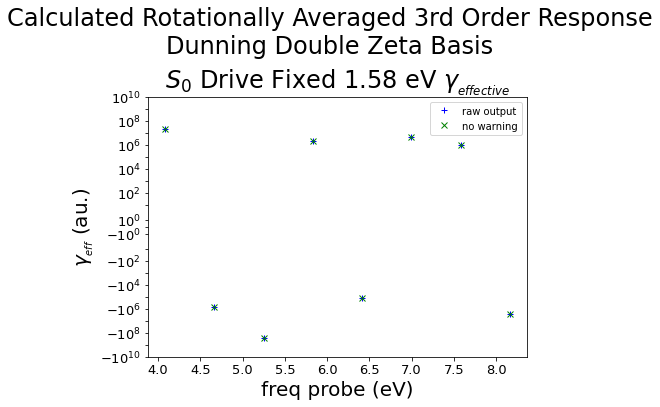

In [66]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\drive_fixed_euv_freq_004_corrected')
plot_data_frames([output_df_freq_004c, good_df_freq_004c],
                 ['raw output', 'no warning'],
                 "$S_0$ Drive Fixed 1.58 eV",
                 x_axis='freq probe (eV)',
                 plot_measured_ground_state=False,
                 display_the_dfs=True,
                 yscale="symlog",
                 ylims_gamma=[-1*10**10, 1*10**10],
                 #ylims_chi3=[-1*10**-17, 1*10**-16],
                 nochi3=True,
                 nth_label_to_keep=2)

found file  = state-1_freqd-0.15_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.17142857142857143_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.19285714285714284_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.21428571428571427_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2357142857142857_freqp-0.0584_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out


<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0584,1.589145,780.194393,0.150000,4.081708,303.755684,NaN,2.004363e+07,2.609679e-17,False
1,0.0584,1.589145,780.194393,0.171429,4.664821,265.785559,NaN,-6.789083e+05,-9.579275e-19,False
2,0.0584,1.589145,780.194393,0.192857,5.247906,236.254596,NaN,-2.686330e+08,-4.229597e-16,False
3,0.0584,1.589145,780.194393,0.214286,5.831019,212.628695,NaN,2.117020e+06,3.895539e-18,False


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0584,1.589145,780.194393,0.150000,4.081708,303.755684,NaN,2.004363e+07,2.609679e-17,False
1,0.0584,1.589145,780.194393,0.171429,4.664821,265.785559,NaN,-6.789083e+05,-9.579275e-19,False
2,0.0584,1.589145,780.194393,0.192857,5.247906,236.254596,NaN,-2.686330e+08,-4.229597e-16,False
3,0.0584,1.589145,780.194393,0.214286,5.831019,212.628695,NaN,2.117020e+06,3.895539e-18,False


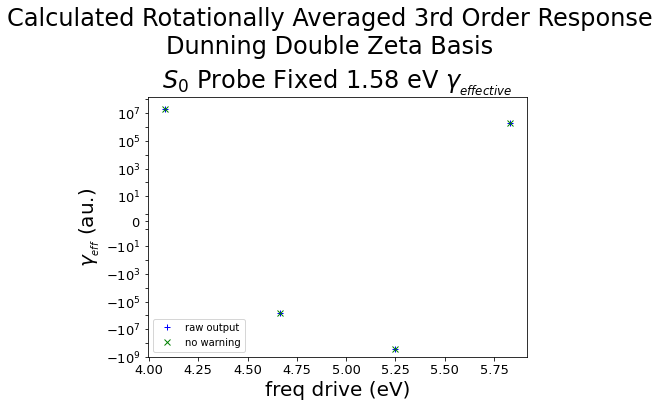

In [67]:
output_df_freq_004, good_df_freq_004 = get_dfs('drive_fixed_euv_freq_004')
plot_data_frames([output_df_freq_004, good_df_freq_004],
                 ['raw output', 'no warning'],
                 "$S_0$ Probe Fixed 1.58 eV",
                 x_axis='freq drive (eV)',
                 plot_measured_ground_state=False,
                display_the_dfs=True,
                yscale="symlog",
                 ylims_gamma=[-1*10**9, 1.5*10**8],
                nochi3=True,
                 nth_label_to_keep=2)

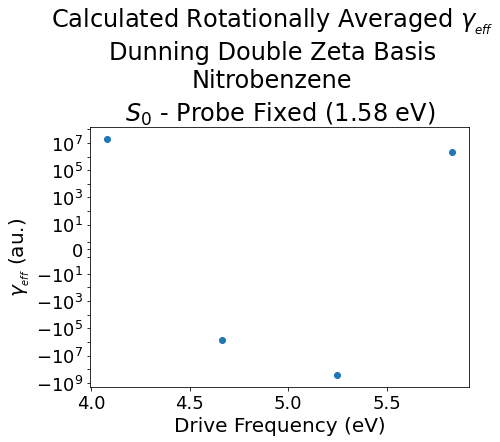

In [12]:
x_axis = "freq drive (eV)"
descripter =  "$S_0$ - Probe Fixed (1.58 eV)"
fig = plt.figure(figsize=[6, 4.2])
ax = plt.gca()
sup_title = "Calculated Rotationally Averaged $\gamma_{\t_{eff}}$\nDunning Double Zeta Basis\nNitrobenzene"
fig.suptitle(sup_title, y=1.35, fontsize=24)
plt.tight_layout()

ax.plot(good_df_freq_004[x_axis], good_df_freq_004['gamma effective'], 'o')
y_label = "$\gamma_{\t_{eff}}$ (au.)"
x_label = "Drive Frequency (eV)"
ax.set_title("{1}".format("", descripter), fontsize=24, y=1.13)
ax.set_ylabel(y_label, fontsize=20)
ax.set_xlabel(x_label, fontsize=20)
#ax.set_xlim(2.5,8.1)
#ax.set_ylim(-6.512657e+07, 3.430942e+07)
ax.set_yscale('symlog')
ax.tick_params(labelsize=18)
n = 2  # Keeps every nth label
for index, label in enumerate(ax.yaxis.get_ticklabels()):
    if index % n !=0:
        label.set_visible(False)

found file  = state-1_freqd-0.0023333333333333335_freqp-0.0023333333333333335_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.004666666666666667_freqp-0.004666666666666667_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.007000000000000001_freqp-0.007000000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.009333333333333334_freqp-0.009333333333333334_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.011666666666666667_freqp-0.011666666666666667_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.014000000000000002_freqp-0.014000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.016333333333333335_freqp-0.016333333333333335_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.o

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.007000,0.190480,6509.050361,0.007000,0.190480,6509.050361,NaN,6348.611963,6.715212e-21,True
1,0.009333,0.253964,4881.962127,0.009333,0.253964,4881.962127,NaN,6482.115677,6.859999e-21,True
2,0.011667,0.317475,3905.318636,0.011667,0.317475,3905.318636,NaN,36109.913260,3.824064e-20,True
3,0.014000,0.380959,3254.525181,0.014000,0.380959,3254.525181,NaN,36664.703003,3.886005e-20,True
4,0.016333,0.444444,2789.649944,0.016333,0.444444,2789.649944,NaN,21144.417710,2.243225e-20,True
5,0.018667,0.507955,2440.850299,0.018667,0.507955,2440.850299,NaN,51151.253200,5.432770e-20,False
6,0.021000,0.571439,2169.683454,0.021000,0.571439,2169.683454,NaN,51899.366903,5.519262e-20,False
7,0.023333,0.634923,1952.743005,0.023333,0.634923,1952.743005,NaN,53020.432320,5.646545e-20,False
8,0.025667,0.698435,1775.172499,0.025667,0.698435,1775.172499,NaN,54310.913760,5.793147e-20,False
9,0.028000,0.761919,1627.262590,0.028000,0.761919,1627.262590,NaN,56079.538300,5.992212e-20,False


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
5,0.018667,0.507955,2440.850299,0.018667,0.507955,2440.850299,NaN,51151.253200,5.432770e-20,False
6,0.021000,0.571439,2169.683454,0.021000,0.571439,2169.683454,NaN,51899.366903,5.519262e-20,False
7,0.023333,0.634923,1952.743005,0.023333,0.634923,1952.743005,NaN,53020.432320,5.646545e-20,False
8,0.025667,0.698435,1775.172499,0.025667,0.698435,1775.172499,NaN,54310.913760,5.793147e-20,False
9,0.028000,0.761919,1627.262590,0.028000,0.761919,1627.262590,NaN,56079.538300,5.992212e-20,False
10,0.030333,0.825403,1502.105052,0.030333,0.825403,1502.105052,NaN,57595.709187,6.165900e-20,False
19,0.051333,1.396842,887.603540,0.051333,1.396842,887.603540,NaN,91203.322293,1.000569e-19,False
20,0.053667,1.460353,849.001296,0.053667,1.460353,849.001296,NaN,99387.967077,1.094286e-19,False
21,0.056000,1.523838,813.631295,0.056000,1.523838,813.631295,NaN,109911.816033,1.214738e-19,False
22,0.058333,1.587322,781.090507,0.058333,1.587322,781.090507,NaN,124245.082270,1.378613e-19,False


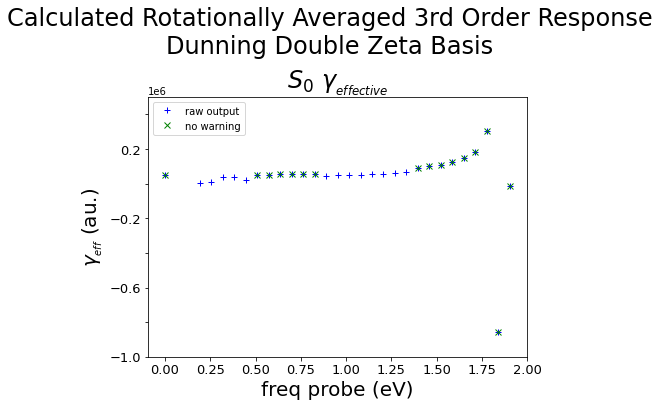

In [19]:
output_df_freq_low_003, good_df_freq_low_003 = get_dfs('low_freq_003')
plot_data_frames([output_df_freq_low_003, good_df_freq_low_003],
                 ['raw output', 'no warning'],
                 "$S_0$",
                 x_axis='freq probe (eV)',
                 plot_measured_ground_state=False,
                display_the_dfs=True,
                yscale="linear",
                 nochi3=True,
  #              xlims=[-.1, 1.8],
                ylims_gamma=[-1*10**6, 5*10**5],
#                ylims_chi3=[0, 1.5*10**-18],
                 nth_label_to_keep=2,
                )

found file  = state-1_freqd-0.15000000000000002_freqp-0.15000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.1752436768756_freqp-0.1752436768756_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.1_freqp-0.1_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2336582357116_freqp-0.2336582357116_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.25_freqp-0.25_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2920727945476_freqp-0.2920727945476_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.292_freqp-0.292_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2_freqp-0.2_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = stat

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.15,4.08171,303.756,0.15,4.08171,303.756,NaN,5.86968e+07,8.96648e-17,0
1,0.175244,4.76863,260,0.175244,4.76863,260,NaN,1.87729e+06,3.48451e-18,0
2,0.1,2.72114,455.634,0.1,2.72114,455.634,NaN,2.87413e+06,3.64561e-18,0
3,0.233658,6.35816,195,0.233658,6.35816,195,NaN,3.07672e+07,1.42323e-16,0
4,0.292073,7.94771,156,0.292073,7.94771,156,NaN,1.76322e+07,1.30944e-14,1
5,0.292,7.94572,156.039,0.292,7.94572,156.039,NaN,2.18076e+07,1.58176e-14,0
6,0.2,5.44228,227.817,0.2,5.44228,227.817,NaN,1.12276e+06,2.74795e-18,1
7,0.3,8.16342,151.878,0.3,8.16342,151.878,NaN,1.03279e+07,1.35242e-12,0
8,0.35045,9.53623,130.014,0.35045,9.53623,130.014,NaN,4.42448e+07,6.21341e-20,0
9,0.35,9.52399,130.181,0.35,9.52399,130.181,NaN,1.92191e+08,3.24672e-19,0


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.15,4.08171,303.756,0.15,4.08171,303.756,NaN,5.86968e+07,8.96648e-17,0
1,0.175244,4.76863,260,0.175244,4.76863,260,NaN,1.87729e+06,3.48451e-18,0
2,0.1,2.72114,455.634,0.1,2.72114,455.634,NaN,2.87413e+06,3.64561e-18,0
3,0.233658,6.35816,195,0.233658,6.35816,195,NaN,3.07672e+07,1.42323e-16,0
5,0.292,7.94572,156.039,0.292,7.94572,156.039,NaN,2.18076e+07,1.58176e-14,0
7,0.3,8.16342,151.878,0.3,8.16342,151.878,NaN,1.03279e+07,1.35242e-12,0
8,0.35045,9.53623,130.014,0.35045,9.53623,130.014,NaN,4.42448e+07,6.21341e-20,0
9,0.35,9.52399,130.181,0.35,9.52399,130.181,NaN,1.92191e+08,3.24672e-19,0


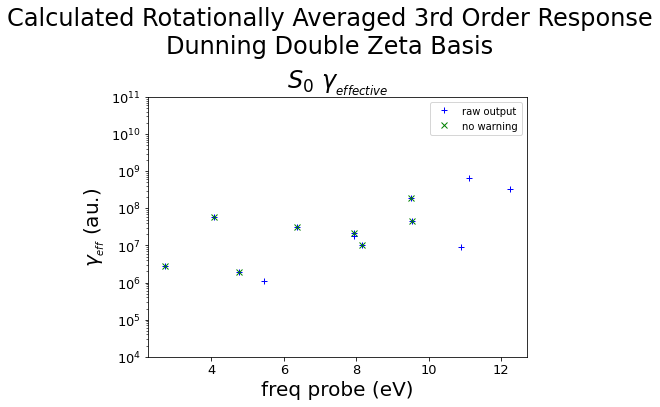

In [25]:
output_df_freq_EUV_002_1, good_df_freq_EUV_002_1 = get_dfs('EUV_freq_dep_001-002')
plot_data_frames([abs(output_df_freq_EUV_002_1), abs(good_df_freq_EUV_002_1)],
                 ['raw output', 'no warning'],
                 "$S_0$",#" - absolute value",
                 plot_measured_ground_state=False,
                display_the_dfs=True,
                yscale="log",
                ylims_gamma=[1*10**4, 1*10**11],
                nochi3=True
                )


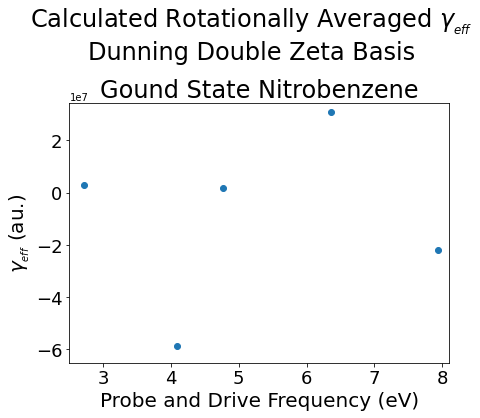

In [68]:
x_axis = "freq probe (eV)"
descripter =  "Gound State"
fig = plt.figure(figsize=[6, 4.2])
ax = plt.gca()
sup_title = "Calculated Rotationally Averaged $\gamma_{\t_{eff}}$\nDunning Double Zeta Basis"
fig.suptitle(sup_title, y=1.27, fontsize=24)
plt.tight_layout()

ax.plot(good_df_freq_EUV_002_1[x_axis], good_df_freq_EUV_002_1['gamma effective'], 'o')
y_label = "$\gamma_{\t_{eff}}$ (au.)"
x_label = "Probe and Drive Frequency (eV)"
ax.set_title("{1} {0}".format("Nitrobenzene", descripter), fontsize=24, y=1.13)
ax.tick_params(labelsize=18)
ax.set_ylabel(y_label, fontsize=20)
ax.set_xlabel(x_label, fontsize=20)
ax.set_xlim(2.5,8.1)
ax.set_ylim(-6.512657e+07, 3.430942e+07)
ax.set_yscale('linear')

found file  = state-1_freqd-0.15000000000000002_freqp-0.15000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.1_freqp-0.1_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.25_freqp-0.25_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2_freqp-0.2_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.30000000000000004_freqp-0.30000000000000004_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.35_freqp-0.35_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.45000000000000007_freqp-0.45000000000000007_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.4_freqp-0.4_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.15,4.081708,303.755684,0.15,4.081708,303.755684,NaN,-5.869681e+07,-8.966481e-17,False
1,0.10,2.721139,455.633525,0.10,2.721139,455.633525,NaN,2.874134e+06,3.645609e-18,False
2,0.20,5.442277,227.816763,0.20,5.442277,227.816763,NaN,-1.122765e+06,-2.747951e-18,True
3,0.30,8.163416,151.877842,0.30,8.163416,151.877842,NaN,-1.032788e+07,-1.352418e-12,False
4,0.35,9.523985,130.181007,0.35,9.523985,130.181007,NaN,-1.921909e+08,-3.246724e-19,False
5,0.45,12.245124,101.251895,0.45,12.245124,101.251895,NaN,-3.375513e+08,-1.409764e-17,True
6,0.40,10.884554,113.908381,0.40,10.884554,113.908381,NaN,-9.060805e+06,-6.836885e-20,True


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.15,4.081708,303.755684,0.15,4.081708,303.755684,NaN,-5.869681e+07,-8.966481e-17,False
1,0.10,2.721139,455.633525,0.10,2.721139,455.633525,NaN,2.874134e+06,3.645609e-18,False
3,0.30,8.163416,151.877842,0.30,8.163416,151.877842,NaN,-1.032788e+07,-1.352418e-12,False
4,0.35,9.523985,130.181007,0.35,9.523985,130.181007,NaN,-1.921909e+08,-3.246724e-19,False


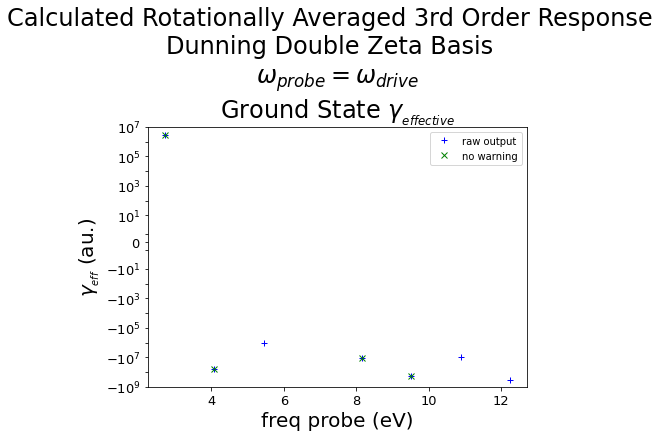

In [49]:
output_df_freq_EUV_002, good_df_freq_EUV_002 = get_dfs('euv_freq_002')
plot_data_frames([output_df_freq_EUV_002, good_df_freq_EUV_002],
                 ['raw output', 'no warning'],
                 "$\omega_{probe} = \omega_{drive}$\nGround State",
                 plot_measured_ground_state=False,
                display_the_dfs=True,
                 nochi3=True,
                 ylims_gamma=[-1*10**9, 1*10**7],
                yscale="symlog",
                nth_label_to_keep=2,
                sup_y=1.35
                )

found file  = state-1_freqd-0.1752436768756_freqp-0.1752436768756_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2336582357116_freqp-0.2336582357116_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.2920727945476_freqp-0.2920727945476_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.292_freqp-0.292_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.35045_freqp-0.35045_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out
found file  = state-1_freqd-0.4089_freqp-0.4089_spin-1_CN_disp-0.0_ONO_rot-0.0_cubic_response_NBopt_dunningZ-2.out


<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.175244,4.768632,259.999501,0.175244,4.768632,259.999501,NaN,1.877294e+06,3.484506e-18,False
1,0.233658,6.358158,195.000182,0.233658,6.358158,195.000182,NaN,3.076719e+07,1.423229e-16,False
2,0.292073,7.947711,155.999879,0.292073,7.947711,155.999879,NaN,-1.763217e+07,-1.309436e-14,True
3,0.292000,7.945725,156.038879,0.292000,7.945725,156.038879,NaN,-2.180758e+07,-1.581761e-14,False
4,0.350450,9.536230,130.013847,0.350450,9.536230,130.013847,NaN,-4.424483e+07,-6.213409e-20,False
5,0.408900,11.126736,111.429084,0.408900,11.126736,111.429084,NaN,-6.770190e+08,-8.406601e-18,True


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.175244,4.768632,259.999501,0.175244,4.768632,259.999501,NaN,1.877294e+06,3.484506e-18,False
1,0.233658,6.358158,195.000182,0.233658,6.358158,195.000182,NaN,3.076719e+07,1.423229e-16,False
3,0.292000,7.945725,156.038879,0.292000,7.945725,156.038879,NaN,-2.180758e+07,-1.581761e-14,False
4,0.350450,9.536230,130.013847,0.350450,9.536230,130.013847,NaN,-4.424483e+07,-6.213409e-20,False


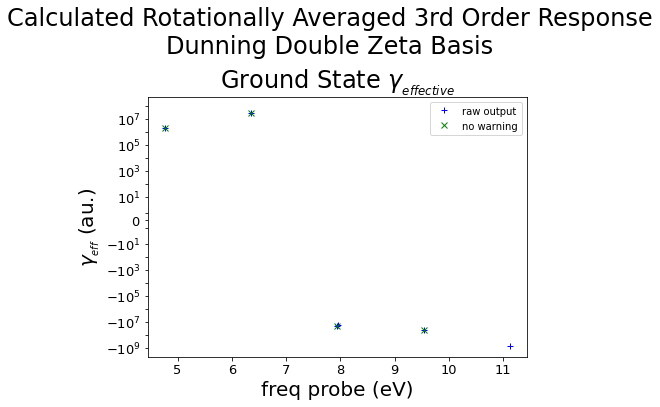

In [55]:
output_df_freq_EUV_001, good_df_freq_EUV_001 = get_dfs('freq_dep_001')
plot_data_frames([output_df_freq_EUV_001, good_df_freq_EUV_001],
                 ['raw output', 'no warning'],
                 "Ground State",
                 plot_measured_ground_state=False,
                display_the_dfs=True,
                nochi3=True,
                yscale='symlog',
                ylims_gamma=[-5*10**9, 5*10**8],
                nth_label_to_keep=2)

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.292100,7.948446,155.985459,0.292100,7.948446,155.985459,0.0,-5.597949e+07,-4.193894e-14,True
1,0.330333,8.988819,137.931580,0.330333,8.988819,137.931580,0.0,1.724885e+07,1.100739e-17,True
2,0.368567,10.029219,123.622984,0.368567,10.029219,123.622984,0.0,-1.801834e+07,-4.514739e-22,True


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag


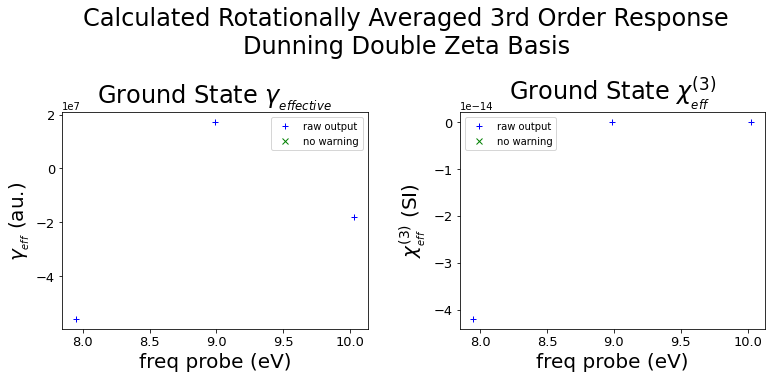

In [57]:
plot_data_frames([output_df_freq_EUV, good_df_freq_EUV],
                 ['raw output', 'no warning'],
                 "Ground State",
                 plot_measured_ground_state=False,
                display_the_dfs=True)

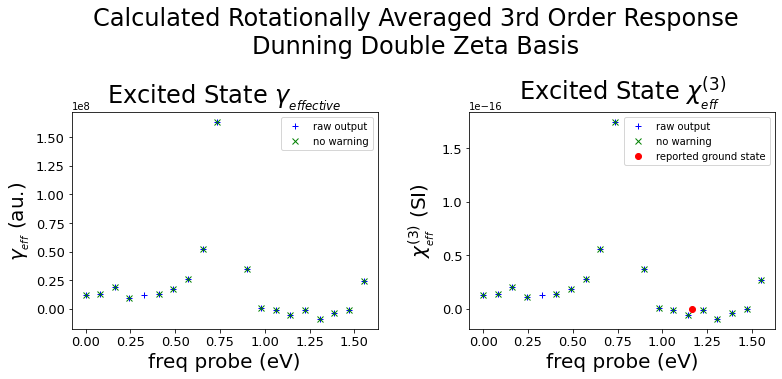

In [58]:
plot_data_frames([output_df_state2, good_df_state2], ['raw output', 'no warning'], "Excited State", plot_measured_ground_state=True)

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.006,0.163268,7593.892088,0.006,0.163268,7593.892088,NaN,6302.007403,6.664732e-21,True
1,0.009,0.244902,5062.594725,0.009,0.244902,5062.594725,NaN,6289.014583,6.655085e-21,True
2,0.012,0.326537,3796.946044,0.012,0.326537,3796.946044,NaN,36170.321543,3.830875e-20,True
3,0.015,0.408171,3037.556835,0.015,0.408171,3037.556835,NaN,20909.410930,2.217021e-20,True
4,0.018,0.489805,2531.297363,0.018,0.489805,2531.297363,NaN,50893.564163,5.403582e-20,False
5,0.021,0.571439,2169.683454,0.021,0.571439,2169.683454,NaN,51899.366903,5.519262e-20,False
6,0.024,0.653073,1898.473022,0.024,0.653073,1898.473022,NaN,53371.623057,5.686429e-20,False
7,0.027,0.734707,1687.531575,0.027,0.734707,1687.531575,NaN,55413.106740,5.916477e-20,False
8,0.033,0.897976,1380.707652,0.033,0.897976,1380.707652,NaN,45159.367423,4.845965e-20,True
9,0.036,0.979610,1265.648681,0.036,0.979610,1265.648681,NaN,47678.120010,5.131153e-20,True


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
4,0.018,0.489805,2531.297363,0.018,0.489805,2531.297363,NaN,50893.564163,5.403582e-20,False
5,0.021,0.571439,2169.683454,0.021,0.571439,2169.683454,NaN,51899.366903,5.519262e-20,False
6,0.024,0.653073,1898.473022,0.024,0.653073,1898.473022,NaN,53371.623057,5.686429e-20,False
7,0.027,0.734707,1687.531575,0.027,0.734707,1687.531575,NaN,55413.106740,5.916477e-20,False
11,0.030,0.816342,1518.778418,0.030,0.816342,1518.778418,NaN,57339.346993,6.136735e-20,False
15,0.051,1.387781,893.399069,0.051,1.387781,893.399069,NaN,90176.062793,9.888072e-20,False
16,0.054,1.469415,843.765788,0.054,1.469415,843.765788,NaN,100724.476773,1.109586e-19,False
17,0.057,1.551049,799.357062,0.057,1.551049,799.357062,NaN,115455.807517,1.278153e-19,False
18,0.060,1.632683,759.389209,0.060,1.632683,759.389209,NaN,138519.722550,1.541558e-19,False
19,0.000,0.000000,0.000000,0.000,0.000000,0.000000,NaN,47553.087760,5.026537e-20,False


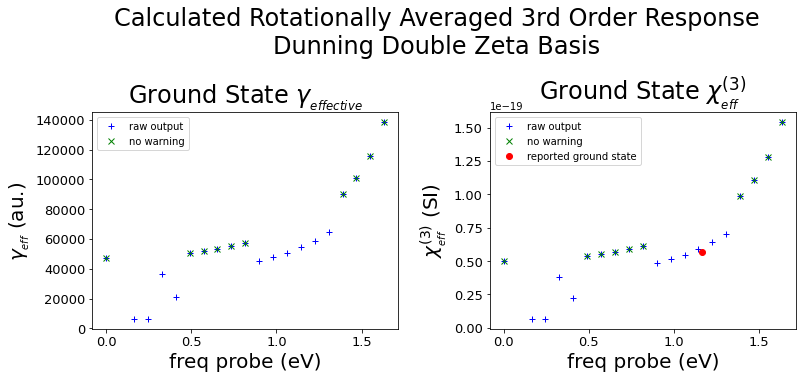

In [59]:
plot_data_frames([output_df_state1, good_df_state1],
                 ['raw output', 'no warning'],
                 "Ground State",
                 plot_measured_ground_state=True,
                 display_the_dfs=True)

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.006,0.163268,7593.892088,0.006,0.163268,7593.892088,NaN,6302.007403,6.664732e-21,True
1,0.009,0.244902,5062.594725,0.009,0.244902,5062.594725,NaN,6289.014583,6.655085e-21,True
2,0.012,0.326537,3796.946044,0.012,0.326537,3796.946044,NaN,36170.321543,3.830875e-20,True
3,0.015,0.408171,3037.556835,0.015,0.408171,3037.556835,NaN,20909.410930,2.217021e-20,True
4,0.018,0.489805,2531.297363,0.018,0.489805,2531.297363,NaN,50893.564163,5.403582e-20,False
5,0.021,0.571439,2169.683454,0.021,0.571439,2169.683454,NaN,51899.366903,5.519262e-20,False
6,0.024,0.653073,1898.473022,0.024,0.653073,1898.473022,NaN,53371.623057,5.686429e-20,False
7,0.027,0.734707,1687.531575,0.027,0.734707,1687.531575,NaN,55413.106740,5.916477e-20,False
8,0.033,0.897976,1380.707652,0.033,0.897976,1380.707652,NaN,45159.367423,4.845965e-20,True
9,0.036,0.979610,1265.648681,0.036,0.979610,1265.648681,NaN,47678.120010,5.131153e-20,True


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
4,0.018,0.489805,2531.297363,0.018,0.489805,2531.297363,NaN,50893.564163,5.403582e-20,False
5,0.021,0.571439,2169.683454,0.021,0.571439,2169.683454,NaN,51899.366903,5.519262e-20,False
6,0.024,0.653073,1898.473022,0.024,0.653073,1898.473022,NaN,53371.623057,5.686429e-20,False
7,0.027,0.734707,1687.531575,0.027,0.734707,1687.531575,NaN,55413.106740,5.916477e-20,False
11,0.030,0.816342,1518.778418,0.030,0.816342,1518.778418,NaN,57339.346993,6.136735e-20,False
15,0.051,1.387781,893.399069,0.051,1.387781,893.399069,NaN,90176.062793,9.888072e-20,False
16,0.054,1.469415,843.765788,0.054,1.469415,843.765788,NaN,100724.476773,1.109586e-19,False
17,0.057,1.551049,799.357062,0.057,1.551049,799.357062,NaN,115455.807517,1.278153e-19,False
18,0.060,1.632683,759.389209,0.060,1.632683,759.389209,NaN,138519.722550,1.541558e-19,False
19,0.000,0.000000,0.000000,0.000,0.000000,0.000000,NaN,47553.087760,5.026537e-20,False


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.007000,0.190480,6509.050361,0.007000,0.190480,6509.050361,NaN,6348.611963,6.715212e-21,True
1,0.009333,0.253964,4881.962127,0.009333,0.253964,4881.962127,NaN,6482.115677,6.859999e-21,True
2,0.011667,0.317475,3905.318636,0.011667,0.317475,3905.318636,NaN,36109.913260,3.824064e-20,True
3,0.014000,0.380959,3254.525181,0.014000,0.380959,3254.525181,NaN,36664.703003,3.886005e-20,True
4,0.016333,0.444444,2789.649944,0.016333,0.444444,2789.649944,NaN,21144.417710,2.243225e-20,True
5,0.018667,0.507955,2440.850299,0.018667,0.507955,2440.850299,NaN,51151.253200,5.432770e-20,False
6,0.021000,0.571439,2169.683454,0.021000,0.571439,2169.683454,NaN,51899.366903,5.519262e-20,False
7,0.023333,0.634923,1952.743005,0.023333,0.634923,1952.743005,NaN,53020.432320,5.646545e-20,False
8,0.025667,0.698435,1775.172499,0.025667,0.698435,1775.172499,NaN,54310.913760,5.793147e-20,False
9,0.028000,0.761919,1627.262590,0.028000,0.761919,1627.262590,NaN,56079.538300,5.992212e-20,False


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
5,0.018667,0.507955,2440.850299,0.018667,0.507955,2440.850299,NaN,51151.253200,5.432770e-20,False
6,0.021000,0.571439,2169.683454,0.021000,0.571439,2169.683454,NaN,51899.366903,5.519262e-20,False
7,0.023333,0.634923,1952.743005,0.023333,0.634923,1952.743005,NaN,53020.432320,5.646545e-20,False
8,0.025667,0.698435,1775.172499,0.025667,0.698435,1775.172499,NaN,54310.913760,5.793147e-20,False
9,0.028000,0.761919,1627.262590,0.028000,0.761919,1627.262590,NaN,56079.538300,5.992212e-20,False
10,0.030333,0.825403,1502.105052,0.030333,0.825403,1502.105052,NaN,57595.709187,6.165900e-20,False
19,0.051333,1.396842,887.603540,0.051333,1.396842,887.603540,NaN,91203.322293,1.000569e-19,False
20,0.053667,1.460353,849.001296,0.053667,1.460353,849.001296,NaN,99387.967077,1.094286e-19,False
21,0.056000,1.523838,813.631295,0.056000,1.523838,813.631295,NaN,109911.816033,1.214738e-19,False
22,0.058333,1.587322,781.090507,0.058333,1.587322,781.090507,NaN,124245.082270,1.378613e-19,False


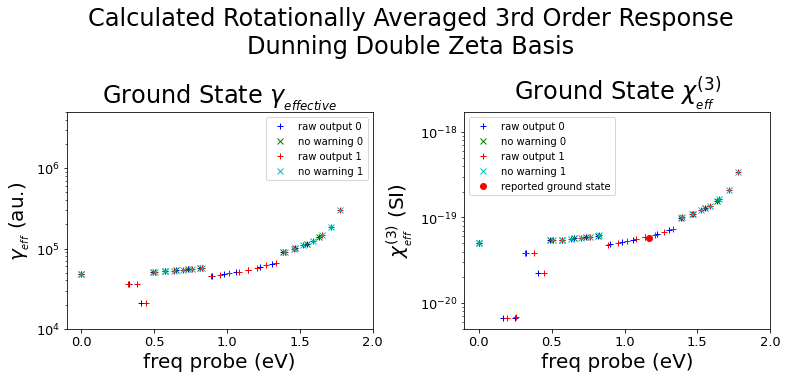

In [64]:
plot_data_frames([output_df_state1, good_df_state1, output_df_freq_low_003, good_df_freq_low_003],
                 ['raw output 0', 'no warning 0', 'raw output 1', 'no warning 1'],
                 "Ground State",
                 plot_measured_ground_state=True,
                 display_the_dfs=True,
                xlims=[-.1, 2],
                ylims_gamma=[1*10**4, 5*10**6],
                ylims_chi3=[5*10**-21, 1.7*10**-18],
                yscale='log')

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0544,1.480299,837.561627,0.0544,1.480299,837.561627,0.0,1.023941e+05,1.128700e-19,False
3,0.0589,1.602751,773.571350,0.0589,1.602751,773.571350,0.0,1.286015e+05,1.428372e-19,False
6,0.0634,1.725202,718.664866,0.0634,1.725202,718.664866,0.0,1.956123e+05,2.190818e-19,False
9,0.0544,1.480299,837.561627,0.0544,1.480299,837.561627,0.0,4.911229e+07,5.413696e-17,False
12,0.0589,1.602751,773.571350,0.0589,1.602751,773.571350,0.0,5.138113e+08,5.706883e-16,False


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
1,0.0544,1.480299,837.561627,0.0544,1.480299,837.561627,1.0,1.023941e+05,1.128700e-19,False
4,0.0589,1.602751,773.571350,0.0589,1.602751,773.571350,1.0,1.286015e+05,1.428372e-19,False
7,0.0634,1.725202,718.664866,0.0634,1.725202,718.664866,1.0,1.956123e+05,2.190818e-19,False
10,0.0544,1.480299,837.561627,0.0544,1.480299,837.561627,1.0,4.911229e+07,5.413696e-17,False
13,0.0589,1.602751,773.571350,0.0589,1.602751,773.571350,1.0,5.138113e+08,5.706883e-16,False


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
2,0.0544,1.480299,837.561627,0.0544,1.480299,837.561627,2.0,1.023941e+05,1.128700e-19,False
5,0.0589,1.602751,773.571350,0.0589,1.602751,773.571350,2.0,1.286015e+05,1.428372e-19,False
8,0.0634,1.725202,718.664866,0.0634,1.725202,718.664866,2.0,1.956123e+05,2.190818e-19,False
11,0.0544,1.480299,837.561627,0.0544,1.480299,837.561627,2.0,4.911229e+07,5.413696e-17,False
14,0.0589,1.602751,773.571350,0.0589,1.602751,773.571350,2.0,5.138113e+08,5.706883e-16,False


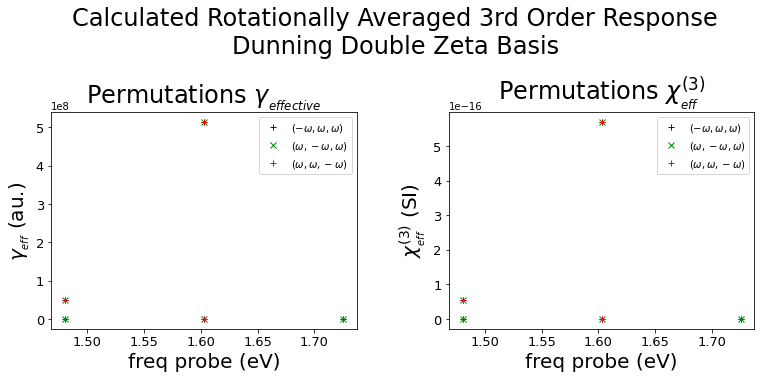

In [22]:
permutation_dfs = []
labels = ["$(-\omega, \omega, \omega )$",
          "$(\omega, -\omega, \omega )$",
          "$(\omega, \omega, -\omega )$"]

for permutation_value in [0, 1, 2]:
    permutation_dfs.append(good_df_freq_perm[good_df_freq_perm.freq_permutation == permutation_value])

plot_data_frames(permutation_dfs, labels, "Permutations", display_the_dfs=True, alpha=1, yscale='linear')